In [12]:
# !pip install scikit-learn
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib

# Windows용 한글 폰트 설정 (맑은 고딕)
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 한글폰트 예시

plt.rcParams['axes.unicode_minus'] = True  # 음수 기호 제대로 표시 설정

import warnings
warnings.filterwarnings('ignore')

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 데이터 불러오기
df = pd.read_csv('train_subway22.csv')  # 파일 경로에 맞게 수정

# 데이터 상위 5개 행 확인
df.head(10)

,Unnamed: 0,train_subway22.tm,train_subway22.line,train_subway22.station_number,train_subway22.station_name,train_subway22.direction,train_subway22.stn,train_subway22.ta,train_subway22.wd,train_subway22.ws,train_subway22.rn_day,train_subway22.rn_hr1,train_subway22.hm,train_subway22.si,train_subway22.ta_chi,train_subway22.congestion
0,1,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,0.0,0.0,34.0,-99.00,-12.8,0
1,2,2022010101,1,150,서울역,상선,419,-9.4,39.4,2.0,0.0,0.0,35.8,-99.00,-10.4,0
2,3,2022010105,1,150,서울역,상선,419,-9.7,350.9,0.9,0.0,0.0,44.5,-99.00,-10.8,2
3,4,2022010106,1,150,서울역,상선,419,-9.4,139.6,0.5,0.0,0.0,43.4,-99.00,-11.0,5
4,5,2022010107,1,150,서울역,상선,419,-10.1,173.6,2.7,0.0,0.0,49.2,-99.00,-10.9,4
5,6,2022010108,1,150,서울역,상선,419,-10.4,165.6,3.1,0.0,0.0,47.0,0.00,-10.7,6
6,7,2022010109,1,150,서울역,상선,419,-10.0,162.7,3.5,0.0,0.0,48.0,0.30,-9.0,8
7,8,2022010110,1,150,서울역,상선,419,-8.8,162.0,2.4,0.0,0.0,41.7,0.84,-6.0,11
8,9,2022010111,1,150,서울역,상선,419,-7.4,167.0,0.9,0.0,0.0,37.5,1.37,-4.1,13
9,10,2022010112,1,150,서울역,상선,419,-5.9,132.8,0.6,0.0,0.0,35.8,1.70,-2.6,17


In [14]:
df['datetime'] = pd.to_datetime(df['train_subway22.tm'].astype(str), format='%Y%m%d%H')
df = df.set_index('datetime') # df = df.reset_index()으로 초기화
df=df.drop(columns=['Unnamed: 0','train_subway22.line','train_subway22.station_number','train_subway22.direction','train_subway22.stn'])

df.head()

,train_subway22.tm,train_subway22.station_name,train_subway22.ta,train_subway22.wd,train_subway22.ws,train_subway22.rn_day,train_subway22.rn_hr1,train_subway22.hm,train_subway22.si,train_subway22.ta_chi,train_subway22.congestion
datetime,,,,,,,,,,,
2022-01-01 00:00:00,2022010100,서울역,-9.4,61.0,3.5,0.0,0.0,34.0,-99.0,-12.8,0
2022-01-01 01:00:00,2022010101,서울역,-9.4,39.4,2.0,0.0,0.0,35.8,-99.0,-10.4,0
2022-01-01 05:00:00,2022010105,서울역,-9.7,350.9,0.9,0.0,0.0,44.5,-99.0,-10.8,2
2022-01-01 06:00:00,2022010106,서울역,-9.4,139.6,0.5,0.0,0.0,43.4,-99.0,-11.0,5
2022-01-01 07:00:00,2022010107,서울역,-10.1,173.6,2.7,0.0,0.0,49.2,-99.0,-10.9,4


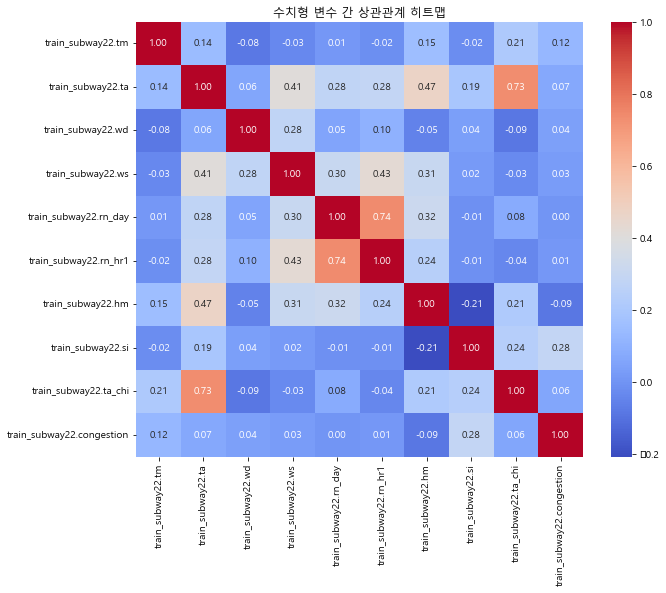

In [15]:
# 수치형 변수 간 상관관계 히트맵
df_numeric = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("수치형 변수 간 상관관계 히트맵")
plt.show()

In [16]:
# 조건에 해당하는 컬럼만 필터링
cols_with_minus_99 = df.columns[(df == -99).any()]
print("다음 컬럼에 -99가 포함되어 있음:")
print(cols_with_minus_99.tolist())

다음 컬럼에 -99가 포함되어 있음:
['train_subway22.ta', 'train_subway22.wd', 'train_subway22.ws', 'train_subway22.rn_day', 'train_subway22.rn_hr1', 'train_subway22.hm', 'train_subway22.si', 'train_subway22.ta_chi']


In [17]:
df.replace(-99, np.nan, inplace=True)
df.isnull().sum()


train_subway22.tm                    0
train_subway22.station_name          0
train_subway22.ta                37922
train_subway22.wd                49768
train_subway22.ws                49768
train_subway22.rn_day            85970
train_subway22.rn_hr1            89830
train_subway22.hm                42860
train_subway22.si              2010112
train_subway22.ta_chi              314
train_subway22.congestion            0
dtype: int64

In [18]:
# datetime 인덱스에서 '시(hour)' 추출
target_hours = [21, 22, 23, 0, 1, 5]

# 4~8월은 주간 06~20시
df.loc[df.index.hour.isin(target_hours), 'train_subway22.si'] = 0

month = df.index.month
hour = df.index.hour

# 3, 9, 10월은 주간 07~19시
cond1 = (month.isin([3, 9, 10])) & (hour.isin([6, 20]))
df.loc[cond1, 'train_subway22.si'] = 0

# 1, 2, 11, 12월은 주간 08~18시
cond2 = (month.isin([1, 2, 11, 12])) & (hour.isin([6, 7, 19, 20]))
df.loc[cond2, 'train_subway22.si'] = 0

df.head(40)

,train_subway22.tm,train_subway22.station_name,train_subway22.ta,train_subway22.wd,train_subway22.ws,train_subway22.rn_day,train_subway22.rn_hr1,train_subway22.hm,train_subway22.si,train_subway22.ta_chi,train_subway22.congestion
datetime,,,,,,,,,,,
2022-01-01 00:00:00,2022010100,서울역,-9.4,61.0,3.5,0.0,0.0,34.0,0.00,-12.8,0
2022-01-01 01:00:00,2022010101,서울역,-9.4,39.4,2.0,0.0,0.0,35.8,0.00,-10.4,0
2022-01-01 05:00:00,2022010105,서울역,-9.7,350.9,0.9,0.0,0.0,44.5,0.00,-10.8,2
2022-01-01 06:00:00,2022010106,서울역,-9.4,139.6,0.5,0.0,0.0,43.4,0.00,-11.0,5
2022-01-01 07:00:00,2022010107,서울역,-10.1,173.6,2.7,0.0,0.0,49.2,0.00,-10.9,4
2022-01-01 08:00:00,2022010108,서울역,-10.4,165.6,3.1,0.0,0.0,47.0,0.00,-10.7,6
2022-01-01 09:00:00,2022010109,서울역,-10.0,162.7,3.5,0.0,0.0,48.0,0.30,-9.0,8
2022-01-01 10:00:00,2022010110,서울역,-8.8,162.0,2.4,0.0,0.0,41.7,0.84,-6.0,11
2022-01-01 11:00:00,2022010111,서울역,-7.4,167.0,0.9,0.0,0.0,37.5,1.37,-4.1,13


In [19]:
df.isnull().sum()

train_subway22.tm                  0
train_subway22.station_name        0
train_subway22.ta              37922
train_subway22.wd              49768
train_subway22.ws              49768
train_subway22.rn_day          85970
train_subway22.rn_hr1          89830
train_subway22.hm              42860
train_subway22.si              35636
train_subway22.ta_chi            314
train_subway22.congestion          0
dtype: int64

In [20]:
# 일조량: 10 시간 동안의 이동평균으로 보간
df['train_subway22.si'] = df['train_subway22.si'].fillna(
    df['train_subway22.si'].rolling(window=10, center=True, min_periods=1).mean()
)

In [21]:
# 온도: 6시간 동안의 이동평균으로 보간
df['train_subway22.ta'] = df['train_subway22.ta'].fillna(
    df['train_subway22.ta'].rolling(window=6, center=True, min_periods=1).mean()
)

In [22]:
# 체감온도: 6시간 동안의 이동평균으로 보간
df['train_subway22.ta_chi'] = df['train_subway22.ta_chi'].fillna(
    df['train_subway22.ta_chi'].rolling(window=6, center=True, min_periods=1).mean()
)

In [23]:
# 일 강수량: 24시간 동안의 이동평균으로 보간
df['train_subway22.rn_day'] = df['train_subway22.rn_day'].fillna(
    df['train_subway22.rn_day'].rolling(window=24, center=True, min_periods=1).mean()
)

In [24]:
# 1h 강수량: 3시간 동안의 이동평균으로 보간
df['train_subway22.rn_hr1'] = df['train_subway22.rn_hr1'].fillna(
    df['train_subway22.rn_hr1'].rolling(window=3, center=True, min_periods=1).mean()
)

In [25]:
# 풍향: 6시간 동안의 이동평균으로 보간
# 그 전에 각도 -> 라디안 -> 벡터 변환

# 풍향을 라디안으로 변환
radians = np.deg2rad(df['train_subway22.wd'])

# 각도 → 벡터 분해
df['sin'] = np.sin(radians)
df['cos'] = np.cos(radians)

# 이동 평균
df['sin_avg'] = df['sin'].rolling(window=6, min_periods=1, center=True).mean()
df['cos_avg'] = df['cos'].rolling(window=6, min_periods=1, center=True).mean()

# 벡터 평균 → 다시 각도로 환산
df['train_subway22.wd'] = (np.arctan2(df['sin_avg'], df['cos_avg']) * 180 / np.pi) % 360

df=df.drop(columns=['sin','cos','sin_avg','cos_avg'])
df.head()

,train_subway22.tm,train_subway22.station_name,train_subway22.ta,train_subway22.wd,train_subway22.ws,train_subway22.rn_day,train_subway22.rn_hr1,train_subway22.hm,train_subway22.si,train_subway22.ta_chi,train_subway22.congestion
datetime,,,,,,,,,,,
2022-01-01 00:00:00,2022010100,서울역,-9.4,31.042846,3.5,0.0,0.0,34.0,0.0,-12.8,0
2022-01-01 01:00:00,2022010101,서울역,-9.4,53.425894,2.0,0.0,0.0,35.8,0.0,-10.4,0
2022-01-01 05:00:00,2022010105,서울역,-9.7,76.939748,0.9,0.0,0.0,44.5,0.0,-10.8,2
2022-01-01 06:00:00,2022010106,서울역,-9.4,101.474175,0.5,0.0,0.0,43.4,0.0,-11.0,5
2022-01-01 07:00:00,2022010107,서울역,-10.1,137.108924,2.7,0.0,0.0,49.2,0.0,-10.9,4


In [26]:
# 풍속: 6시간 동안의 이동평균으로 보간
df['train_subway22.ws'] = df['train_subway22.ws'].fillna(
    df['train_subway22.ws'].rolling(window=6, center=True, min_periods=1).mean()
)

In [27]:
# 습도: 6시간 동안의 이동평균으로 보간
df['train_subway22.hm'] = df['train_subway22.hm'].fillna(
    df['train_subway22.hm'].rolling(window=6, center=True, min_periods=1).mean()
)

In [28]:
df.isnull().sum()

train_subway22.tm                  0
train_subway22.station_name        0
train_subway22.ta              26914
train_subway22.wd              23202
train_subway22.ws              23202
train_subway22.rn_day          13486
train_subway22.rn_hr1          75170
train_subway22.hm              31304
train_subway22.si                420
train_subway22.ta_chi              0
train_subway22.congestion          0
dtype: int64

In [29]:
# 월별 이동평균
df['month'] = df.index.to_period('M')
monthly_mean = df.groupby('month')['train_subway22.ta'].transform('mean')
df['monthly_mean'] = monthly_mean
df['train_subway22.ta'] = df['train_subway22.ta'].fillna(df['monthly_mean'])
df.isnull().sum()

train_subway22.tm                  0
train_subway22.station_name        0
train_subway22.ta                  0
train_subway22.wd              23202
train_subway22.ws              23202
train_subway22.rn_day          13486
train_subway22.rn_hr1          75170
train_subway22.hm              31304
train_subway22.si                420
train_subway22.ta_chi              0
train_subway22.congestion          0
month                              0
monthly_mean                       0
dtype: int64

In [30]:
df['train_subway22.wd'] = df['train_subway22.wd'].fillna(df['monthly_mean'])
df.isnull().sum()

train_subway22.tm                  0
train_subway22.station_name        0
train_subway22.ta                  0
train_subway22.wd                  0
train_subway22.ws              23202
train_subway22.rn_day          13486
train_subway22.rn_hr1          75170
train_subway22.hm              31304
train_subway22.si                420
train_subway22.ta_chi              0
train_subway22.congestion          0
month                              0
monthly_mean                       0
dtype: int64

In [31]:
df['train_subway22.ws'] = df['train_subway22.ws'].fillna(df['monthly_mean'])
df.isnull().sum()

train_subway22.tm                  0
train_subway22.station_name        0
train_subway22.ta                  0
train_subway22.wd                  0
train_subway22.ws                  0
train_subway22.rn_day          13486
train_subway22.rn_hr1          75170
train_subway22.hm              31304
train_subway22.si                420
train_subway22.ta_chi              0
train_subway22.congestion          0
month                              0
monthly_mean                       0
dtype: int64

In [32]:
df['train_subway22.rn_day'] = df['train_subway22.rn_day'].fillna(df['monthly_mean'])
df.isnull().sum()

train_subway22.tm                  0
train_subway22.station_name        0
train_subway22.ta                  0
train_subway22.wd                  0
train_subway22.ws                  0
train_subway22.rn_day              0
train_subway22.rn_hr1          75170
train_subway22.hm              31304
train_subway22.si                420
train_subway22.ta_chi              0
train_subway22.congestion          0
month                              0
monthly_mean                       0
dtype: int64

In [33]:
df['train_subway22.rn_hr1'] = df['train_subway22.rn_hr1'].fillna(df['monthly_mean'])
df.isnull().sum()

train_subway22.tm                  0
train_subway22.station_name        0
train_subway22.ta                  0
train_subway22.wd                  0
train_subway22.ws                  0
train_subway22.rn_day              0
train_subway22.rn_hr1              0
train_subway22.hm              31304
train_subway22.si                420
train_subway22.ta_chi              0
train_subway22.congestion          0
month                              0
monthly_mean                       0
dtype: int64

In [34]:
df['train_subway22.hm'] = df['train_subway22.hm'].fillna(df['monthly_mean'])
df.isnull().sum()

train_subway22.tm                0
train_subway22.station_name      0
train_subway22.ta                0
train_subway22.wd                0
train_subway22.ws                0
train_subway22.rn_day            0
train_subway22.rn_hr1            0
train_subway22.hm                0
train_subway22.si              420
train_subway22.ta_chi            0
train_subway22.congestion        0
month                            0
monthly_mean                     0
dtype: int64

In [35]:
df['train_subway22.si'] = df['train_subway22.si'].fillna(df['monthly_mean'])
df.isnull().sum()

train_subway22.tm              0
train_subway22.station_name    0
train_subway22.ta              0
train_subway22.wd              0
train_subway22.ws              0
train_subway22.rn_day          0
train_subway22.rn_hr1          0
train_subway22.hm              0
train_subway22.si              0
train_subway22.ta_chi          0
train_subway22.congestion      0
month                          0
monthly_mean                   0
dtype: int64

In [36]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 타겟 변수
target = "train_subway22_congestion"

# 피처 이름에서 특수문자(.)를 밑줄(_)로 교체
df.columns = df.columns.str.replace(r"[^\w]", "_", regex=True)

# 특성: 타겟을 제외한 수치형 변수 전부 사용
features = df.select_dtypes(include=["int64", "float64"]).drop(columns=[target]).columns.tolist()

# 결측치 처리
X = df[features].fillna(-999)
y = df[target]

# 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의 및 학습
model = LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)

# 성능 평가
import numpy as np
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.238294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2079
[LightGBM] [Info] Number of data points in the train set: 4316960, number of used features: 10
[LightGBM] [Info] Start training from score 20.869321
RMSE: 16.8910
R^2 Score: 0.2082


In [37]:
df.to_csv('train_subway22_mov.csv', index=True, encoding='utf-8')